In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import calendar
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')

In [2]:
micro = pd.read_csv("C:/Users/user/datasets/Microsoft_Stock.csv")
micro

Date    Open    High     Low   Close    Volume
0      4/1/2015 16:00:00   40.60   40.76   40.31   40.72  36865322
1      4/2/2015 16:00:00   40.66   40.74   40.12   40.29  37487476
2      4/6/2015 16:00:00   40.34   41.78   40.18   41.55  39223692
3      4/7/2015 16:00:00   41.61   41.91   41.31   41.53  28809375
4      4/8/2015 16:00:00   41.48   41.69   41.04   41.42  24753438
...                  ...     ...     ...     ...     ...       ...
1506  3/25/2021 16:00:00  235.30  236.94  231.57  232.34  34061853
1507  3/26/2021 16:00:00  231.55  236.71  231.55  236.48  25479853
1508  3/29/2021 16:00:00  236.59  236.80  231.88  235.24  25227455
1509  3/30/2021 16:00:00  233.53  233.85  231.10  231.85  24792012
1510  3/31/2021 16:00:00  232.91  239.10  232.39  235.77  43623471

[1511 rows x 6 columns]

# <p style="background-color:#1c56c9; font-family:newtimeroman; font-size:150%; text-align:center; border-radius:  25px; color:#ffffff; padding-top:5px; padding-bottom:5px;">Overview</p>

*Context*
* This file contains the stock information of Microsoft from 04/01/2015 to 04/01/2021

*Content*
* This data was acquired in google sheets using the command 'GOOGLEFINANCE'

*Inspiration*
* With this data you can do basic EDA and use predictive analysis.

In [3]:
ms = pd.read_csv("C:/Users/user/datasets/Microsoft_Stock.csv")
ms

Date    Open    High     Low   Close    Volume
0      4/1/2015 16:00:00   40.60   40.76   40.31   40.72  36865322
1      4/2/2015 16:00:00   40.66   40.74   40.12   40.29  37487476
2      4/6/2015 16:00:00   40.34   41.78   40.18   41.55  39223692
3      4/7/2015 16:00:00   41.61   41.91   41.31   41.53  28809375
4      4/8/2015 16:00:00   41.48   41.69   41.04   41.42  24753438
...                  ...     ...     ...     ...     ...       ...
1506  3/25/2021 16:00:00  235.30  236.94  231.57  232.34  34061853
1507  3/26/2021 16:00:00  231.55  236.71  231.55  236.48  25479853
1508  3/29/2021 16:00:00  236.59  236.80  231.88  235.24  25227455
1509  3/30/2021 16:00:00  233.53  233.85  231.10  231.85  24792012
1510  3/31/2021 16:00:00  232.91  239.10  232.39  235.77  43623471

[1511 rows x 6 columns]

In [4]:
print("This dataset has {} observations and {} features. \n" .format(ms.shape[0], ms.shape[1]))

This dataset has 1511 observations and 6 features. 



In [5]:
ms.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
date = ms.groupby('Date')

In [7]:
pd.set_option("display.max_columns", None)
date.describe()

Open                                                      \
                   count    mean std     min     25%     50%     75%     max   
Date                                                                           
1/10/2017 16:00:00   1.0   62.73 NaN   62.73   62.73   62.73   62.73   62.73   
1/10/2018 16:00:00   1.0   87.86 NaN   87.86   87.86   87.86   87.86   87.86   
1/10/2019 16:00:00   1.0  103.22 NaN  103.22  103.22  103.22  103.22  103.22   
1/10/2020 16:00:00   1.0  162.82 NaN  162.82  162.82  162.82  162.82  162.82   
1/11/2016 16:00:00   1.0   52.51 NaN   52.51   52.51   52.51   52.51   52.51   
...                  ...     ...  ..     ...     ...     ...     ...     ...   
9/8/2020 16:00:00    1.0  206.50 NaN  206.50  206.50  206.50  206.50  206.50   
9/9/2015 16:00:00    1.0   44.21 NaN   44.21   44.21   44.21   44.21   44.21   
9/9/2016 16:00:00    1.0   56.79 NaN   56.79   56.79   56.79   56.79   56.79   
9/9/2019 16:00:00    1.0  139.59 NaN  139.59  139.59  139.59  139.59  139.59   
9/9/2020 16:00:00    1.0  207.60 NaN  207.60  207.60  207.60  207.60  207.60   

                    High                                                      \
                   count    mean std     min     25%     50%     75%     max   
Date                                                                           
1/10/2017 16:00:00   1.0   63.07 NaN   63.07   63.07   63.07   63.07   63.07   
1/10/2018 16:00:00   1.0   88.19 NaN   88.19   88.19   88.19   88.19   88.19   
1/10/2019 16:00:00   1.0  103.75 NaN  103.75  103.75  103.75  103.75  103.75   
1/10/2020 16:00:00   1.0  163.22 NaN  163.22  163.22  163.22  163.22  163.22   
1/11/2016 16:00:00   1.0   52.85 NaN   52.85   52.85   52.85   52.85   52.85   
...                  ...     ...  ..     ...     ...     ...     ...     ...   
9/8/2020 16:00:00    1.0  210.03 NaN  210.03  210.03  210.03  210.03  210.03   
9/9/2015 16:00:00    1.0   44.40 NaN   44.40   44.40   44.40   44.40   44.40   
9/9/2016 16:00:00    1.0   57.52 NaN   57.52   57.52   57.52   57.52   57.52   
9/9/2019 16:00:00    1.0  139.75 NaN  139.75  139.75  139.75  139.75  139.75   
9/9/2020 16:00:00    1.0  214.84 NaN  214.84  214.84  214.84  214.84  214.84   

                     Low                                                      \
                   count    mean std     min     25%     50%     75%     max   
Date                                                                           
1/10/2017 16:00:00   1.0   62.28 NaN   62.28   62.28   62.28   62.28   62.28   
1/10/2018 16:00:00   1.0   87.41 NaN   87.41   87.41   87.41   87.41   87.41   
1/10/2019 16:00:00   1.0  102.38 NaN  102.38  102.38  102.38  102.38  102.38   
1/10/2020 16:00:00   1.0  161.18 NaN  161.18  161.18  161.18  161.18  161.18   
1/11/2016 16:00:00   1.0   51.46 NaN   51.46   51.46   51.46   51.46   51.46   
...                  ...     ...  ..     ...     ...     ...     ...     ...   
9/8/2020 16:00:00    1.0  202.20 NaN  202.20  202.20  202.20  202.20  202.20   
9/9/2015 16:00:00    1.0   42.91 NaN   42.91   42.91   42.91   42.91   42.91   
9/9/2016 16:00:00    1.0   56.21 NaN   56.21   56.21   56.21   56.21   56.21   
9/9/2019 16:00:00    1.0  136.46 NaN  136.46  136.46  136.46  136.46  136.46   
9/9/2020 16:00:00    1.0  206.70 NaN  206.70  206.70  206.70  206.70  206.70   

                   Close                                                      \
                   count    mean std     min     25%     50%     75%     max   
Date                                                                           
1/10/2017 16:00:00   1.0   62.62 NaN   62.62   62.62   62.62   62.62   62.62   
1/10/2018 16:00:00   1.0   87.82 NaN   87.82   87.82   87.82   87.82   87.82   
1/10/2019 16:00:00   1.0  103.60 NaN  103.60  103.60  103.60  103.60  103.60   
1/10/2020 16:00:00   1.0  161.34 NaN  161.34  161.34  161.34  161.34  161.34   
1/11/2016 16:00:00   1.0   52.30 NaN   52.30   52.30   52.30   52.30   52.30   
...              

In [8]:
ms.describe().T.style.background_gradient(cmap="cividis")

In [9]:
date.mean().sort_values(by="Volume",ascending=False).head()

Open    High    Low  Close       Volume
Date                                                          
10/23/2015 16:00:00   52.30   54.07  52.25  52.87  135227059.0
6/24/2016 16:00:00    49.81   50.94  49.52  49.83  133502985.0
4/24/2015 16:00:00    45.66   48.14  45.65  47.87  130933665.0
4/22/2016 16:00:00    51.91   52.43  50.77  51.78  126834091.0
12/21/2018 16:00:00  101.63  103.00  97.46  98.23  111242070.0

In [10]:
ms.Date.max()

'9/9/2020 16:00:00'

This is wrong because of date column dtype is wrong

In [11]:
ms['Date']=pd.to_datetime(ms['Date'])
ms['Date'][0]

Timestamp('2015-04-01 16:00:00')

In [12]:
ms.Date.max()

Timestamp('2021-03-31 16:00:00')

In [13]:
ms.Date.min()

Timestamp('2015-04-01 16:00:00')

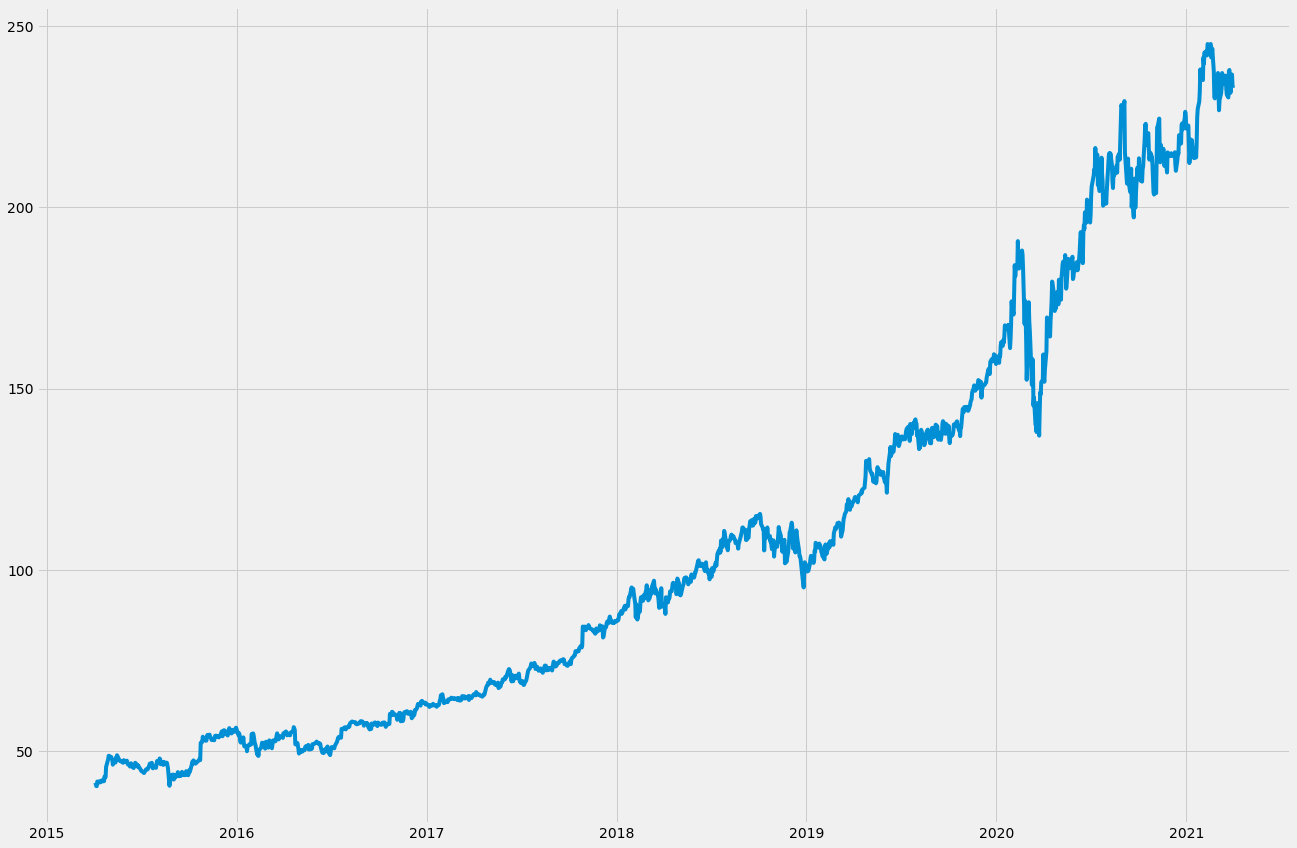

In [14]:
plt.figure(figsize=(20,14))
plt.plot(ms.Date, ms.Open)

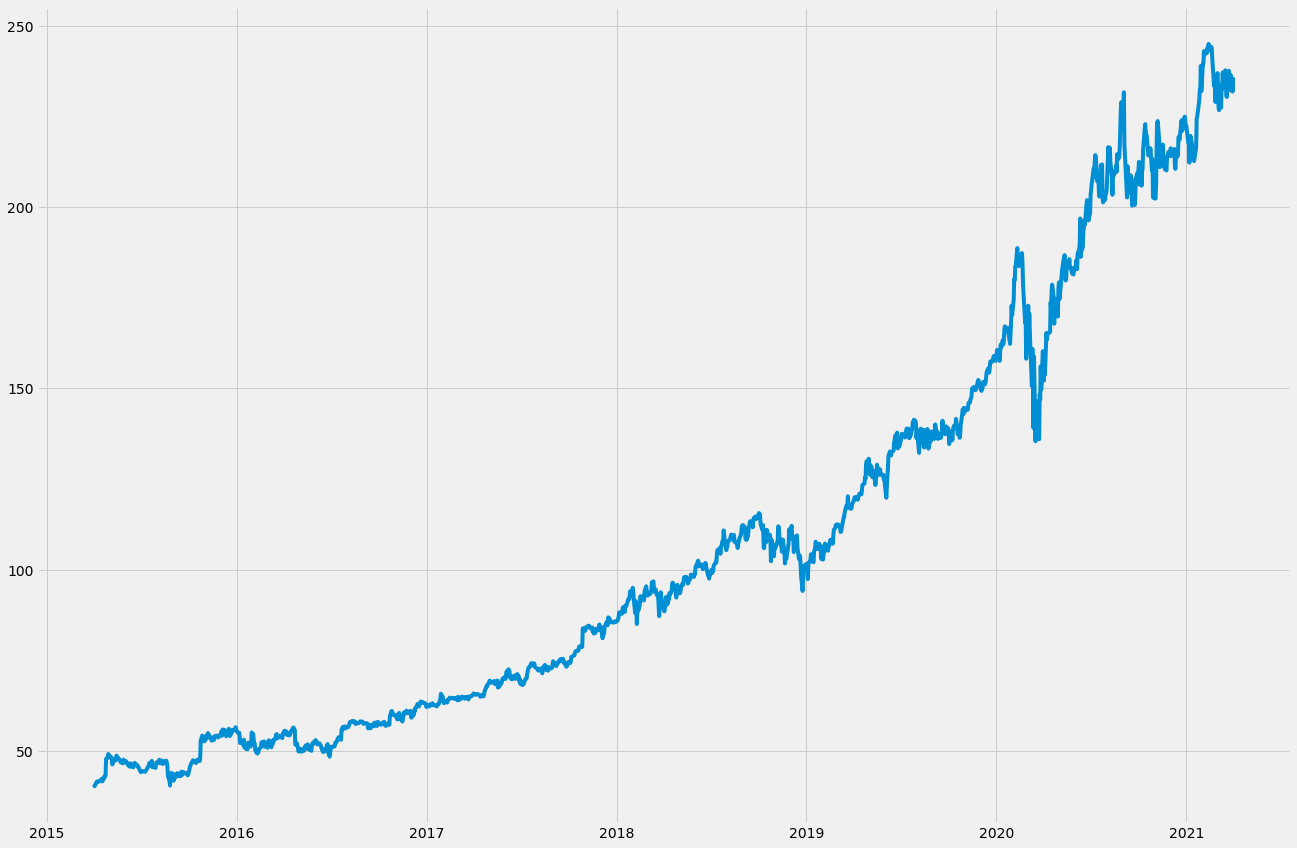

In [15]:
plt.figure(figsize=(20,14))
plt.plot(ms.Date, ms.Close)

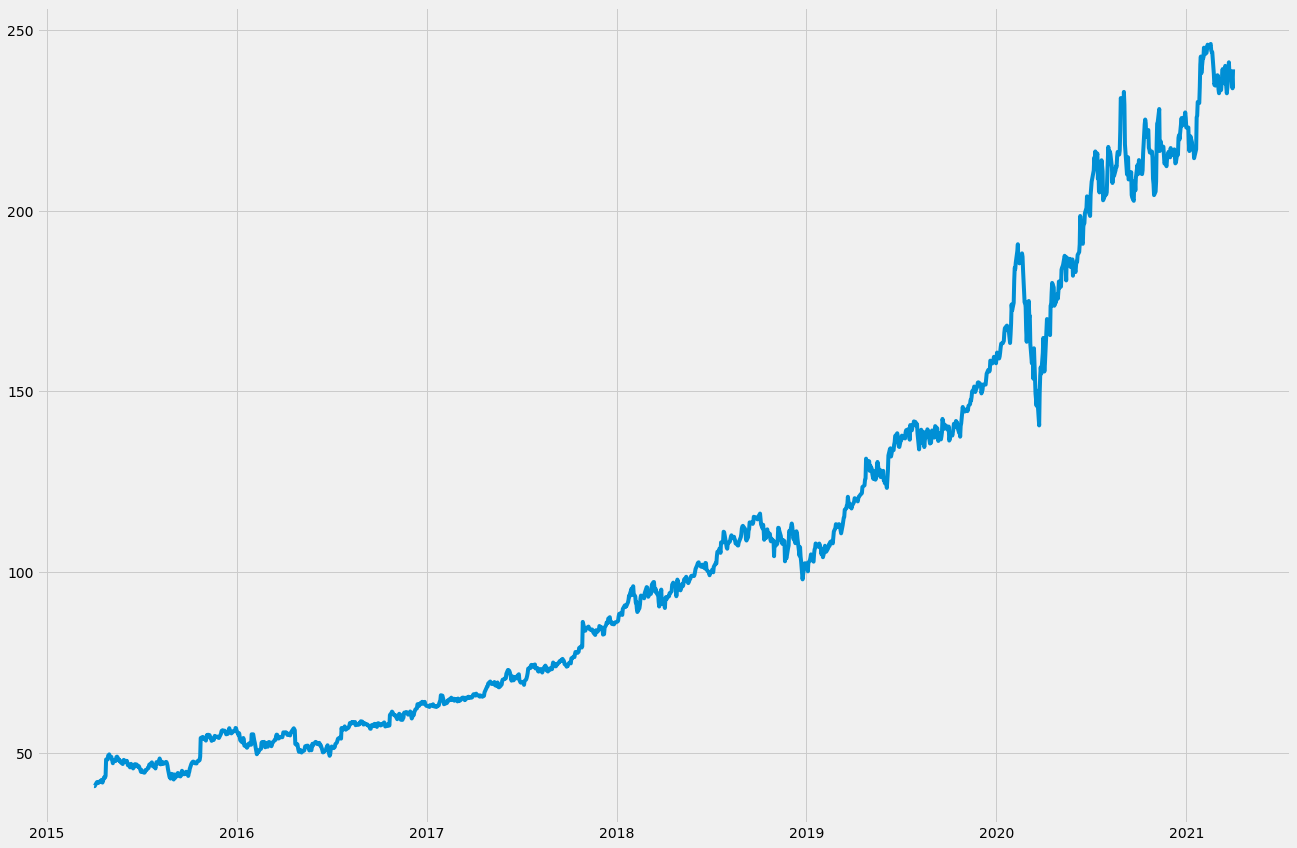

In [16]:
plt.figure(figsize=(20,14))
plt.plot(ms.Date, ms.High)

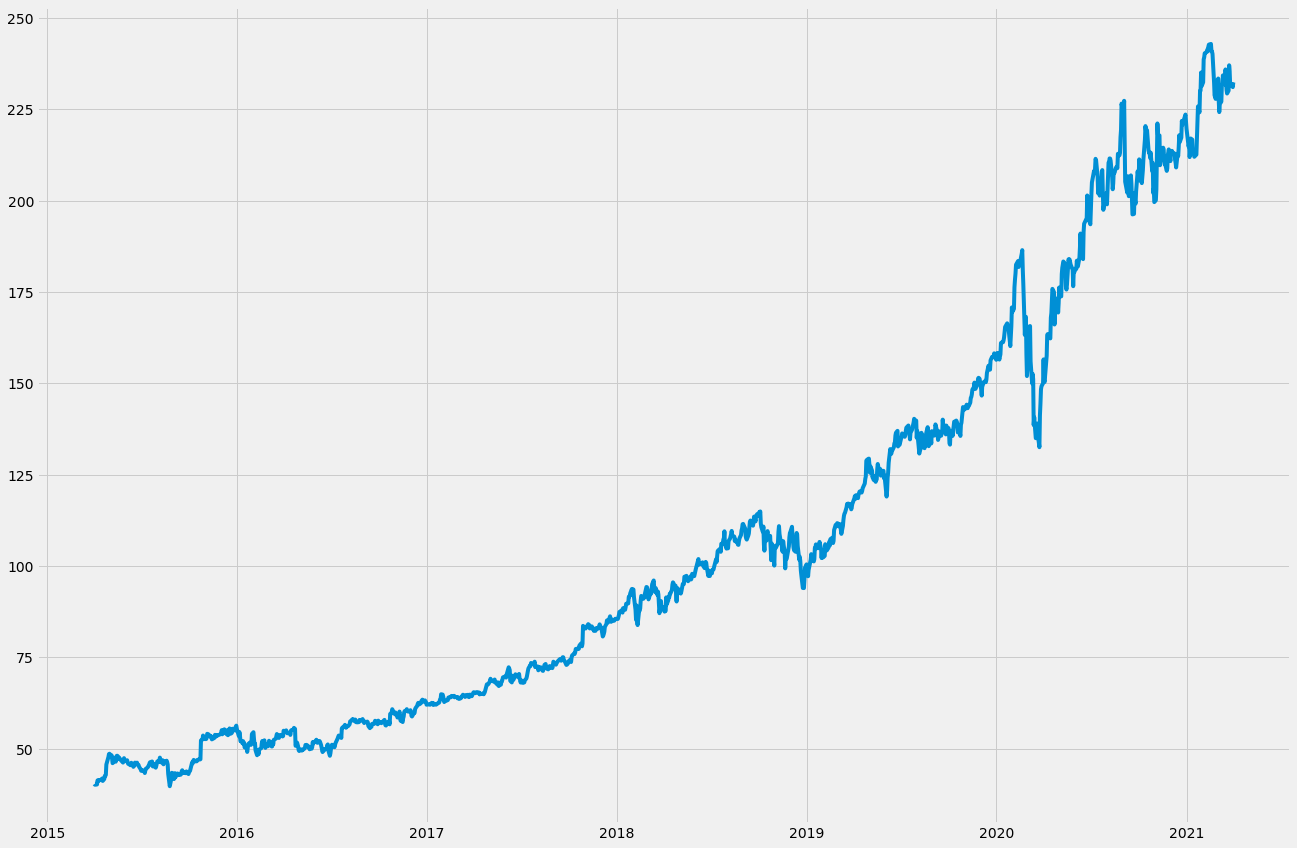

In [17]:
plt.figure(figsize=(20,14))
plt.plot(ms.Date, ms.Low)

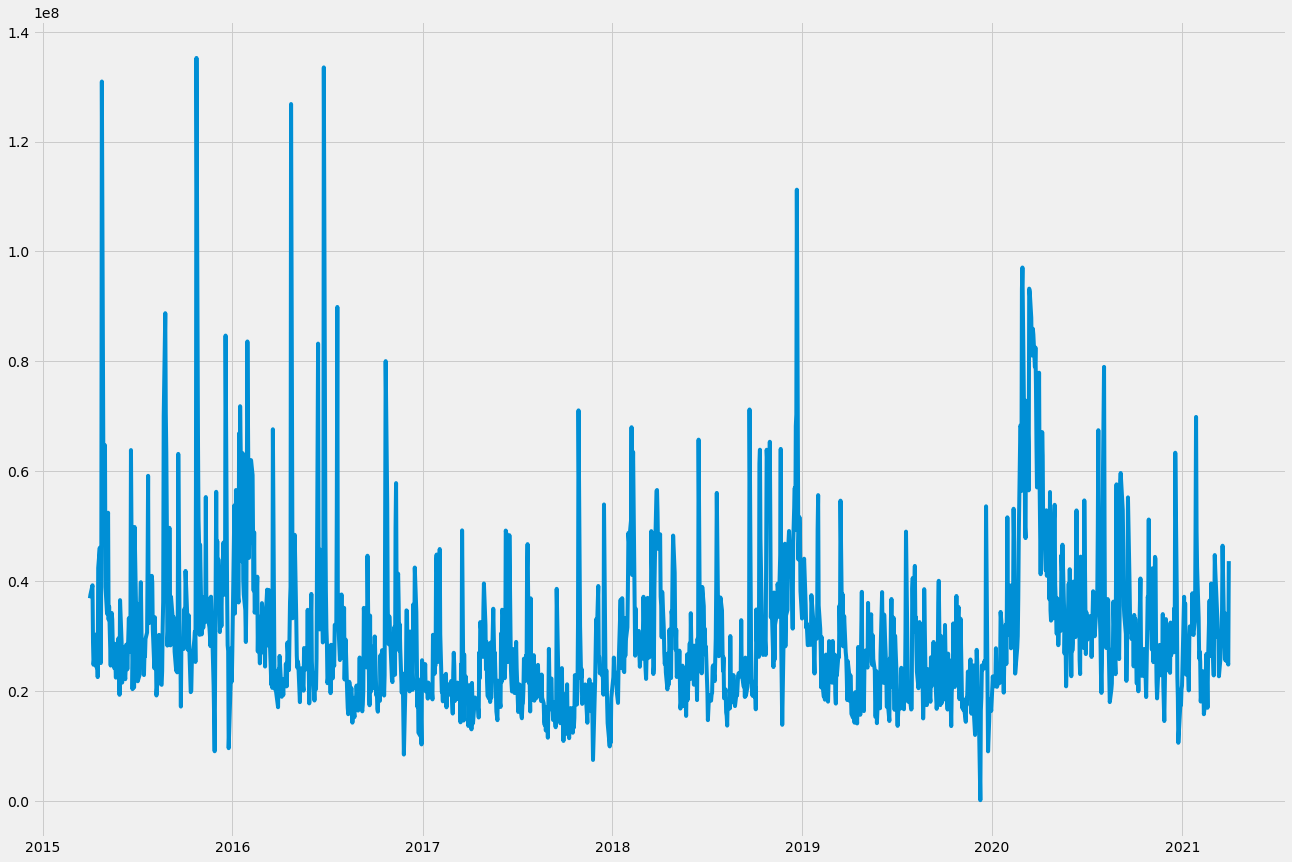

In [18]:
plt.figure(figsize=(20,14))
plt.plot(ms.Date, ms.Volume)

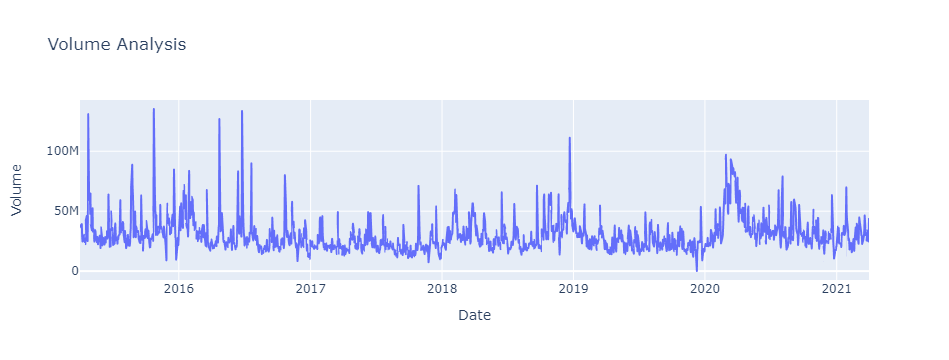

In [19]:
import plotly.express as px
fig = px.line(ms, x="Date", y="Volume", title='Volume Analysis')
fig.show()

In [20]:
ms["Date"].unique()

array(['2015-04-01T16:00:00.000000000', '2015-04-02T16:00:00.000000000',
       '2015-04-06T16:00:00.000000000', ...,
       '2021-03-29T16:00:00.000000000', '2021-03-30T16:00:00.000000000',
       '2021-03-31T16:00:00.000000000'], dtype='datetime64[ns]')

**Analysing Daily price change in stock**

To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company.

In [21]:
# Percentage Return
ms['1day % return']=((ms['Close']-ms['Open'])/ms['Close'])*100
ms.head()

Date   Open   High    Low  Close    Volume  1day % return
0 2015-04-01 16:00:00  40.60  40.76  40.31  40.72  36865322       0.294695
1 2015-04-02 16:00:00  40.66  40.74  40.12  40.29  37487476      -0.918342
2 2015-04-06 16:00:00  40.34  41.78  40.18  41.55  39223692       2.912154
3 2015-04-07 16:00:00  41.61  41.91  41.31  41.53  28809375      -0.192632
4 2015-04-08 16:00:00  41.48  41.69  41.04  41.42  24753438      -0.144858

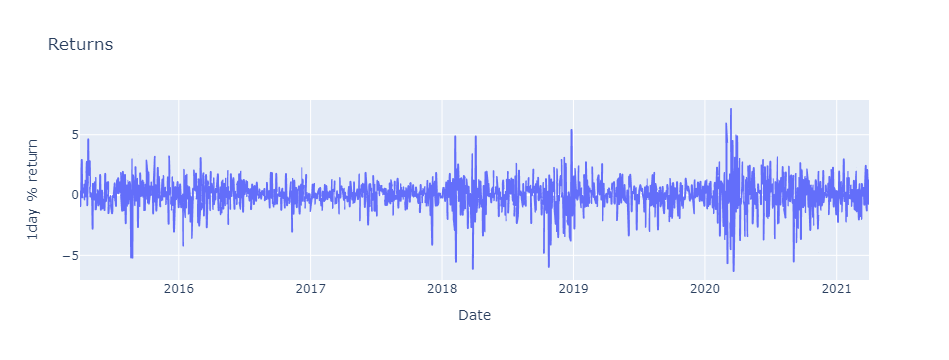

In [22]:
fig = px.line(ms, x="Date", y="1day % return", title='Returns')
fig.show()

<AxesSubplot:>

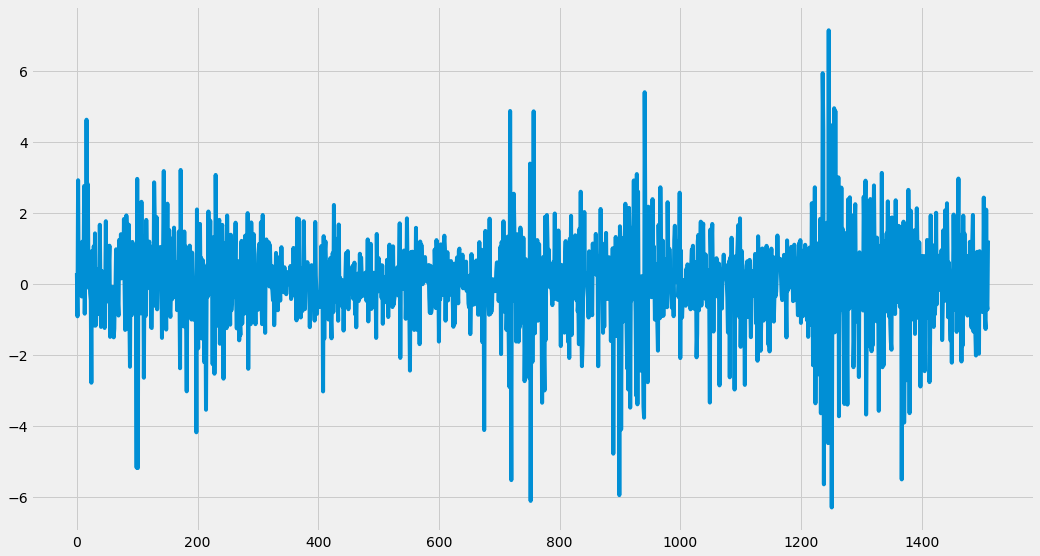

In [23]:
plt.figure(figsize=(16,9))
ms['1day % return'].plot()

# How did Gates retirement in 2021 affect the stock?

(-2.4825020385438763, 3.218950085823594)

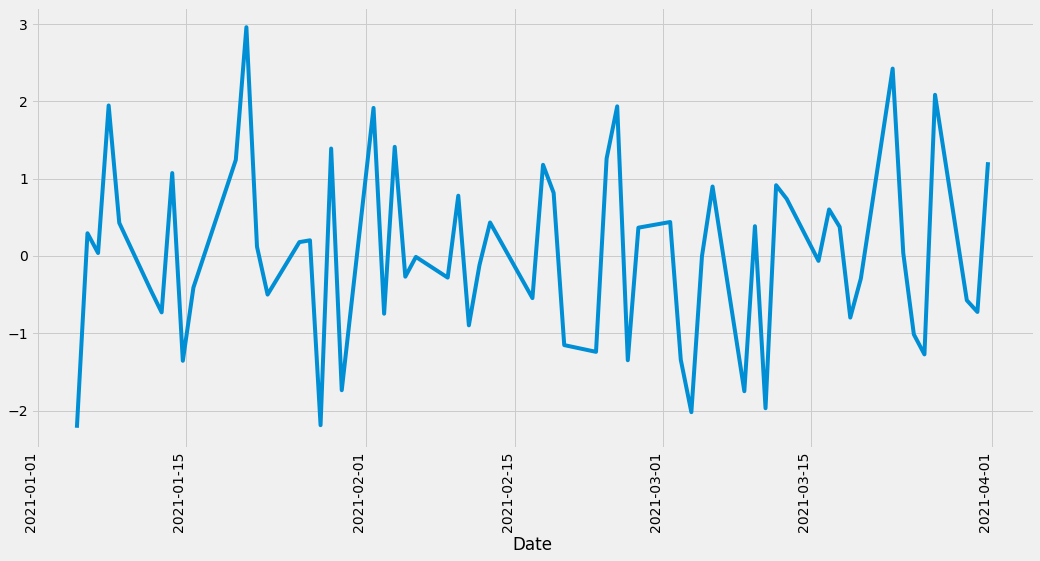

In [24]:
plt.figure(figsize=(16,9))
ms.set_index('Date')['2021-01-01':'2021-12-31']['1day % return'].plot()
plt.xticks(rotation='vertical')
plt.ylim()

(13045080.05, 72576616.95)

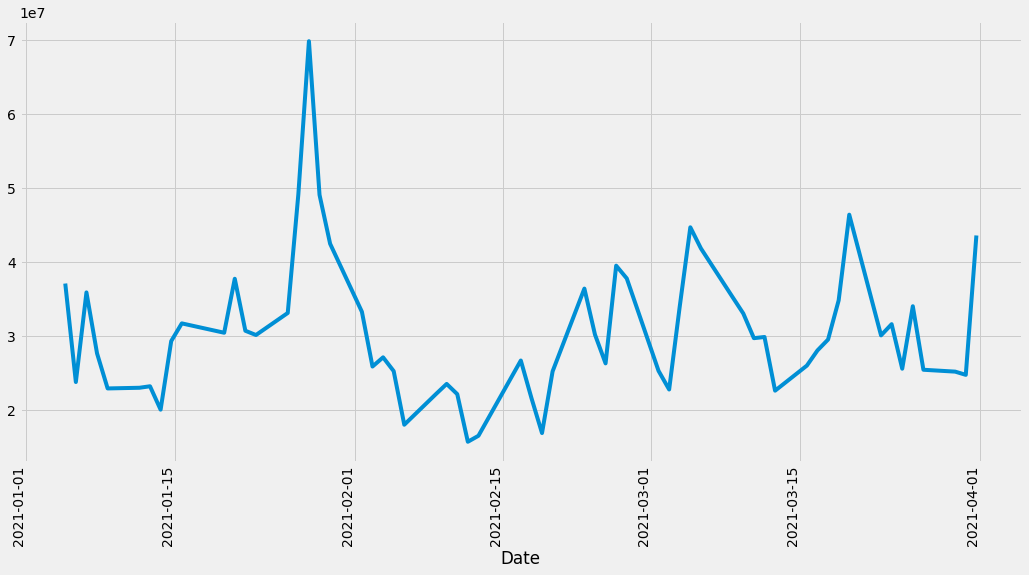

In [25]:
plt.figure(figsize=(16,9))
ms.set_index('Date')['2021-01-01':'2021-12-31']['Volume'].plot()
plt.xticks(rotation='vertical')
plt.ylim()

(210.527, 246.673)

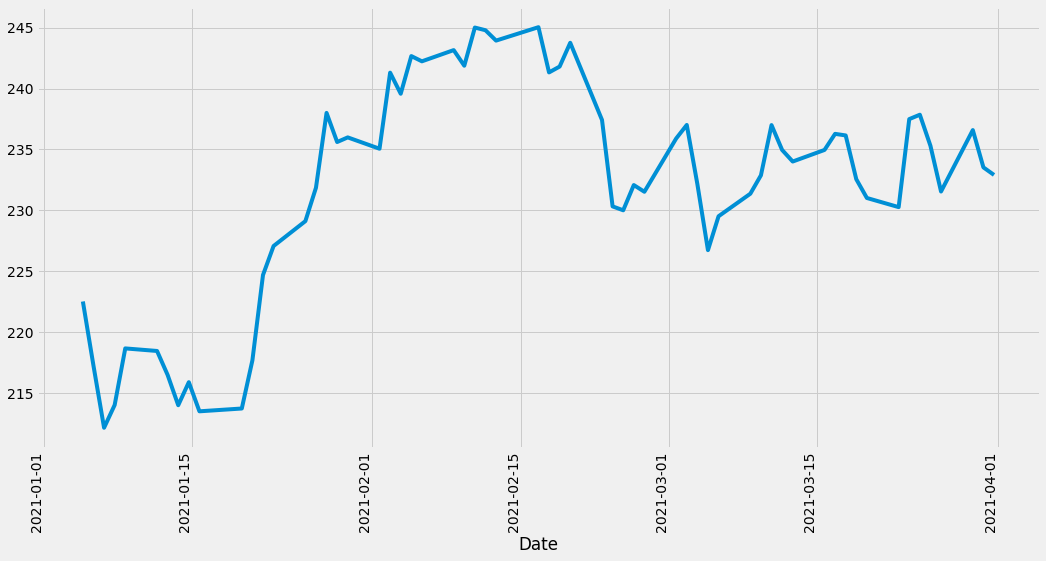

In [26]:
plt.figure(figsize=(16,9))
ms.set_index('Date')['2021-01-01':'2021-12-31']['Open'].plot()
plt.xticks(rotation='vertical')
plt.ylim()

(210.613, 246.627)

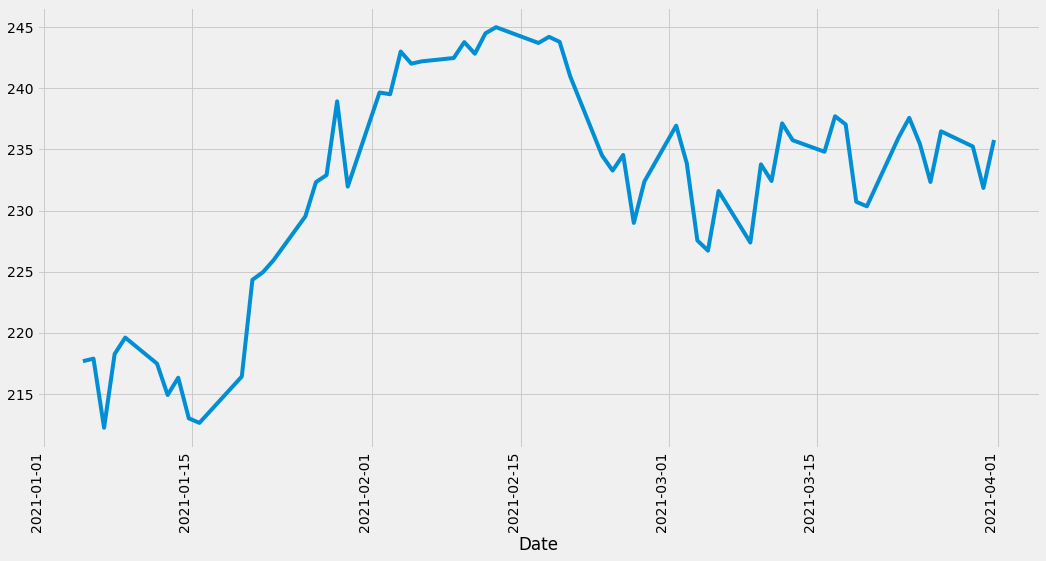

In [27]:
plt.figure(figsize=(16,9))
ms.set_index('Date')['2021-01-01':'2021-12-31']['Close'].plot()
plt.xticks(rotation='vertical')
plt.ylim()

(212.929, 247.71099999999998)

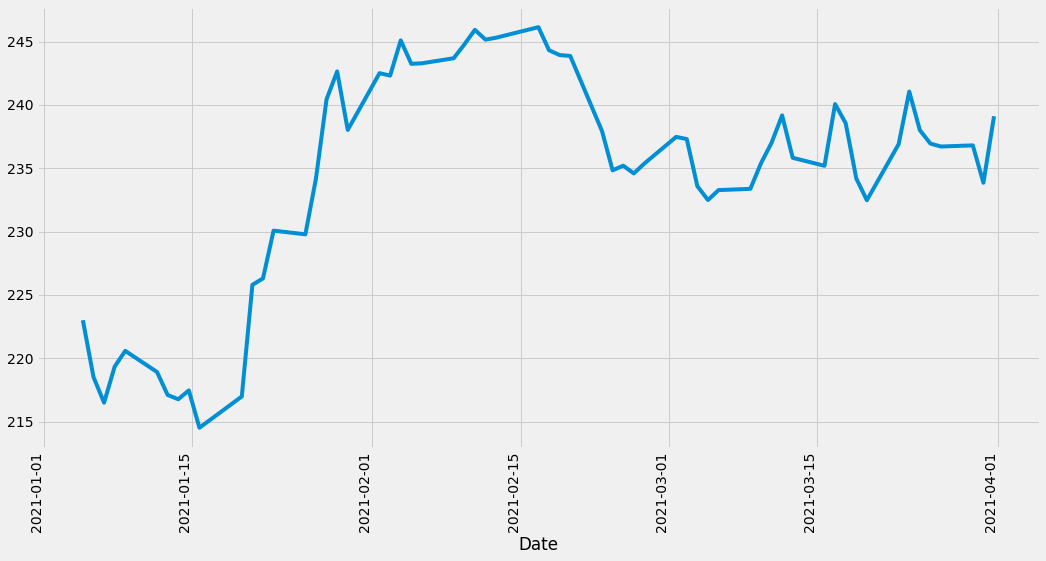

In [28]:
plt.figure(figsize=(16,9))
ms.set_index('Date')['2021-01-01':'2021-12-31']['High'].plot()
plt.xticks(rotation='vertical')
plt.ylim()

(210.391, 244.469)

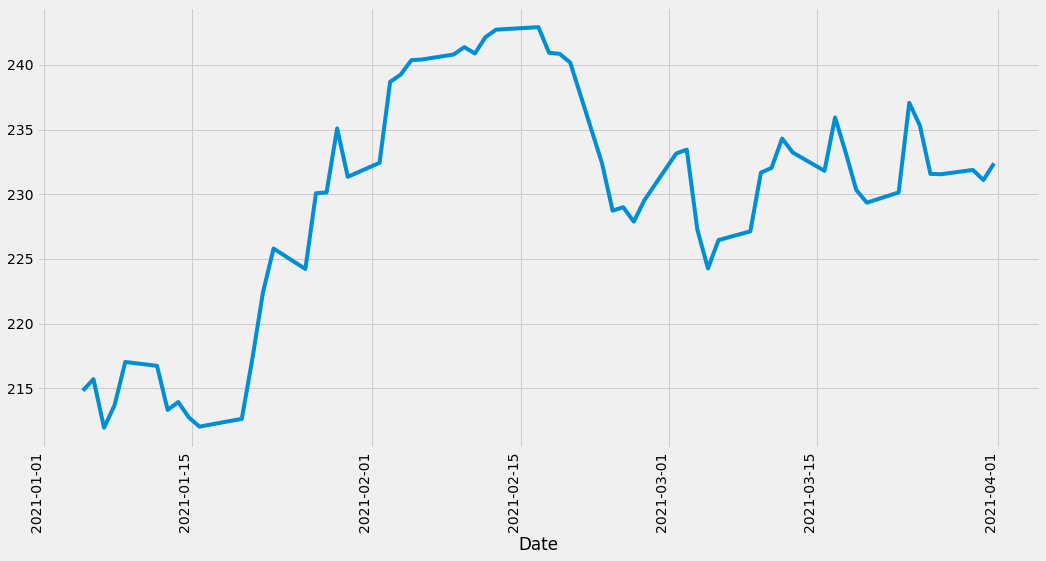

In [29]:
plt.figure(figsize=(16,9))
ms.set_index('Date')['2021-01-01':'2021-12-31']['Low'].plot()
plt.xticks(rotation='vertical')
plt.ylim()

<AxesSubplot:xlabel='Date'>

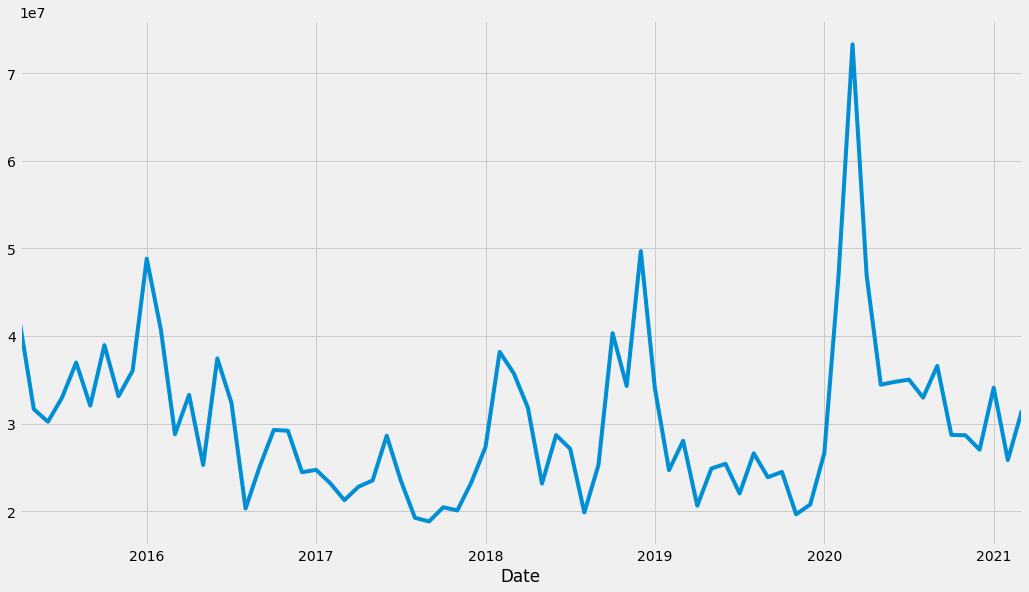

In [30]:
ms2=ms.copy()
ms2['date']=pd.to_datetime(ms2['Date'])
ms2.set_index('Date',inplace=True)
plt.figure(figsize=(16,9))
ms2['Volume'].resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

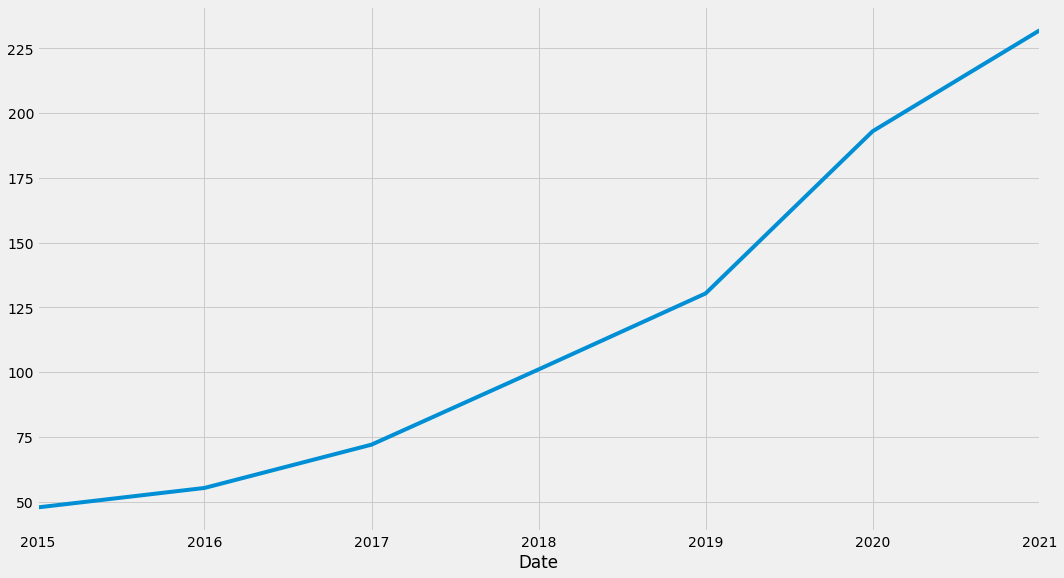

In [31]:
plt.figure(figsize=(16,9))
ms2['Close'].resample('Y').mean().plot()

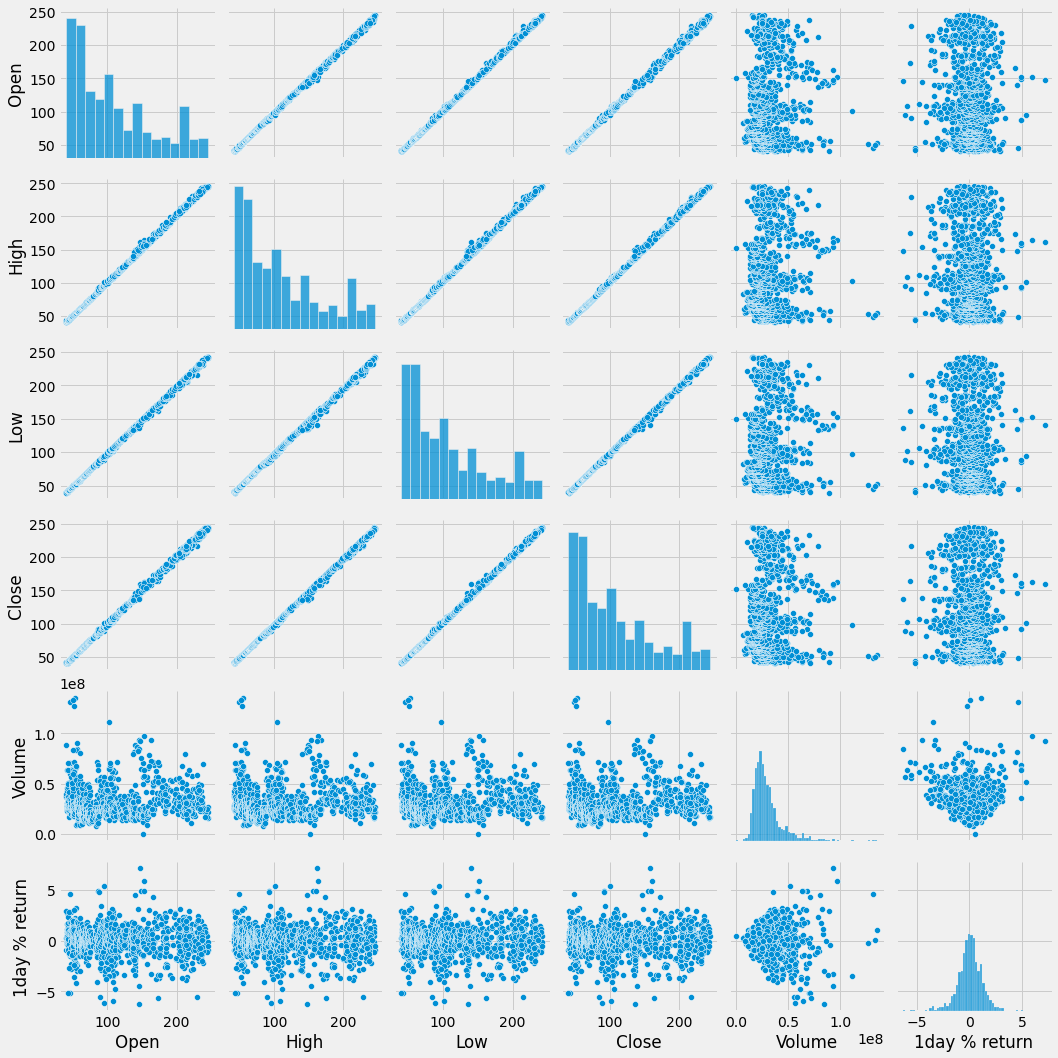

In [32]:
sns.pairplot(ms2)

# Change
* value at risk analysis

In [33]:
ms['ms_change']=((ms['Close']-ms['Open'])/ms['Close'])*100

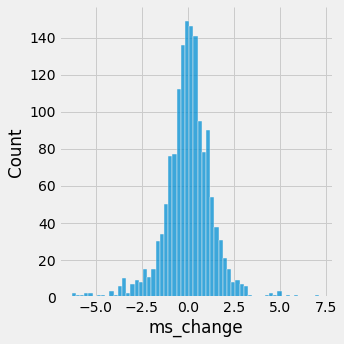

In [34]:
plt.style.use("fivethirtyeight")
sns.displot(ms.ms_change)

In [35]:
ms['ms_change'].std()

1.2882292460822857

In [36]:
ms['ms_change'].quantile(0.1)

-1.3494039041006172

# All times Monthly Average Volume

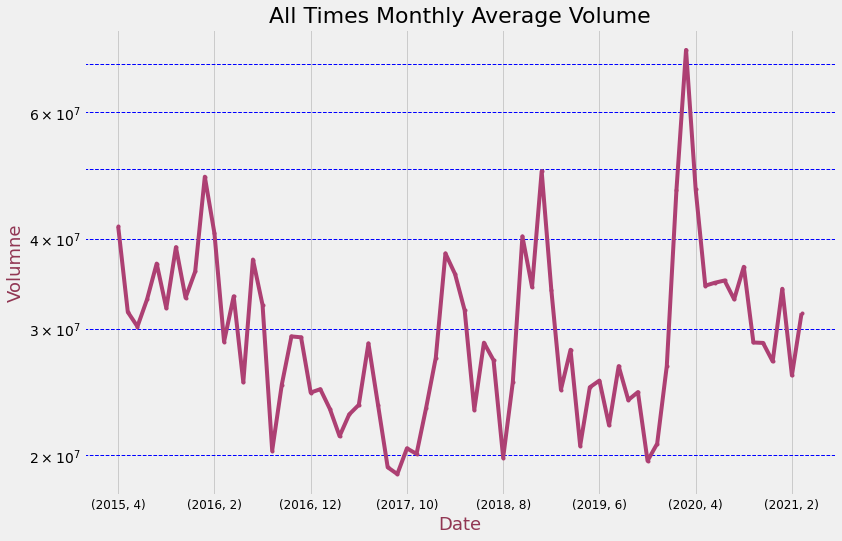

In [37]:
plt.figure(figsize=(12,8))
ms.groupby([ms.Date.dt.year,ms.Date.dt.month])["Volume"].mean().plot(color="#ad4073",marker=".")
plt.xlabel("Date",color="#913653", size=18)
plt.ylabel("Volumne",color="#913653", size=18)
plt.title("All Times Monthly Average Volume",size=22)

plt.yscale("log")
plt.grid(color="blue", linestyle="--", which="minor")
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12, color="#3d8f6e") 
plt.show()

Yearly Volume

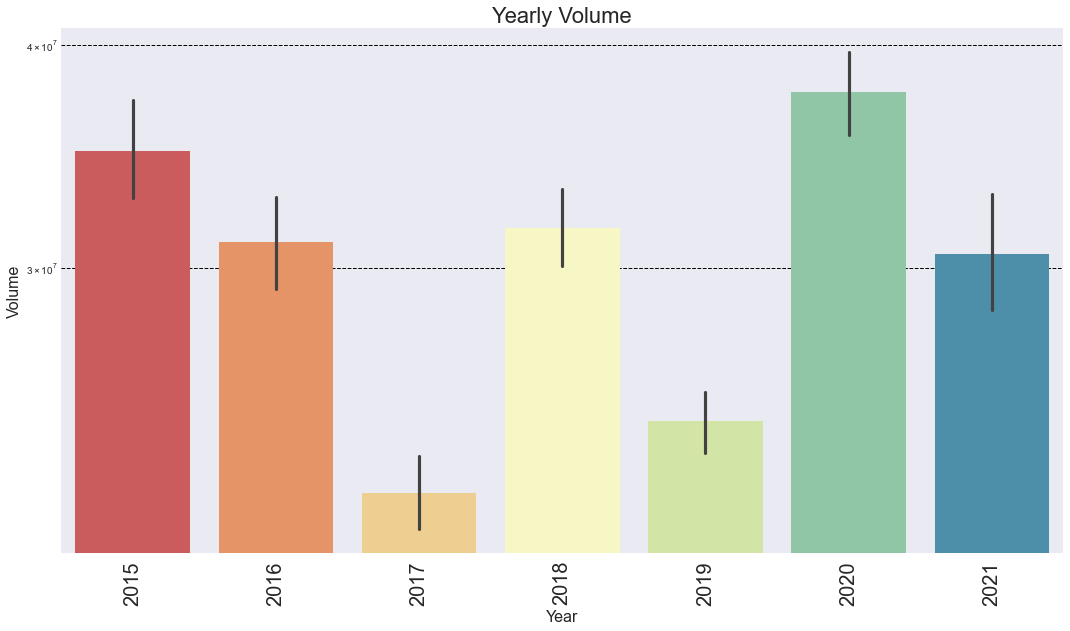

In [38]:
plt.style.use("seaborn")
plt.figure(figsize=(16,9))
g = sns.barplot(x=ms.Date.dt.year, y=ms.Volume, palette="Spectral")
plt.title("Yearly Volume",fontsize=22)
g.set_yscale("log")
plt.xticks(fontsize=20, rotation="vertical") 
plt.yticks(fontsize=12) 
plt.xlabel("Year",fontsize=16)
plt.ylabel("Volume",fontsize=16)
plt.grid(which="minor",color="black", linestyle="--")
plt.show()

# All times monthly average Change

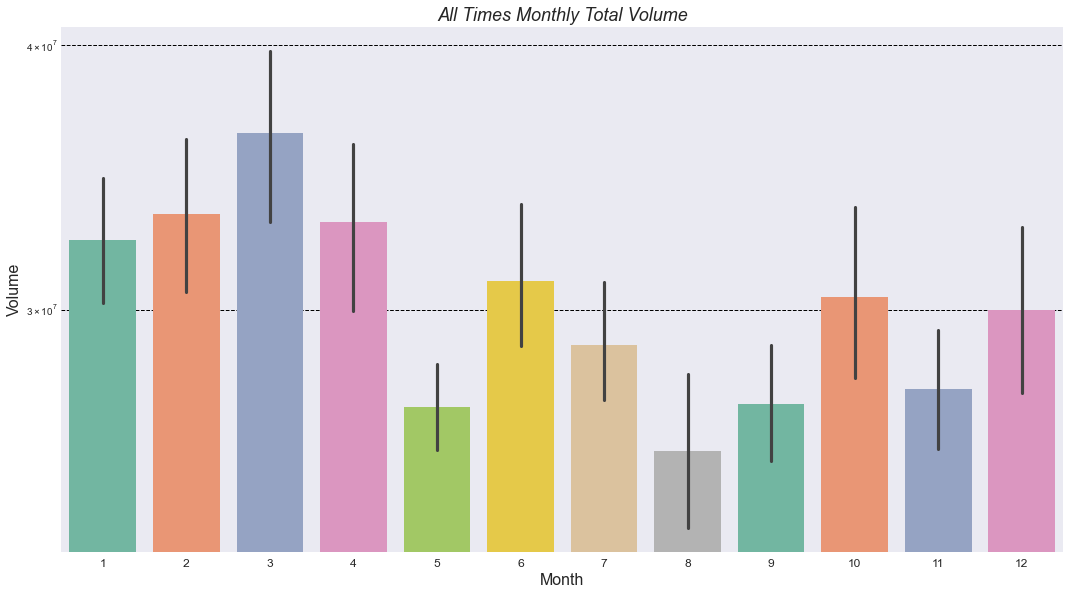

In [39]:
plt.figure(figsize=(16,9))
sns.barplot(x=ms.Date.dt.month, y=ms.Volume, palette="Set2")
plt.title("All Times Monthly Total Volume",fontsize=18, fontstyle="oblique")
plt.yscale("log")
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12, color="#3d8f6e") 
plt.xlabel("Month",fontsize=16)
plt.ylabel("Volume",fontsize=16)
plt.grid(which="minor",color="black", linestyle="--")
plt.show()

Month by Volume Change

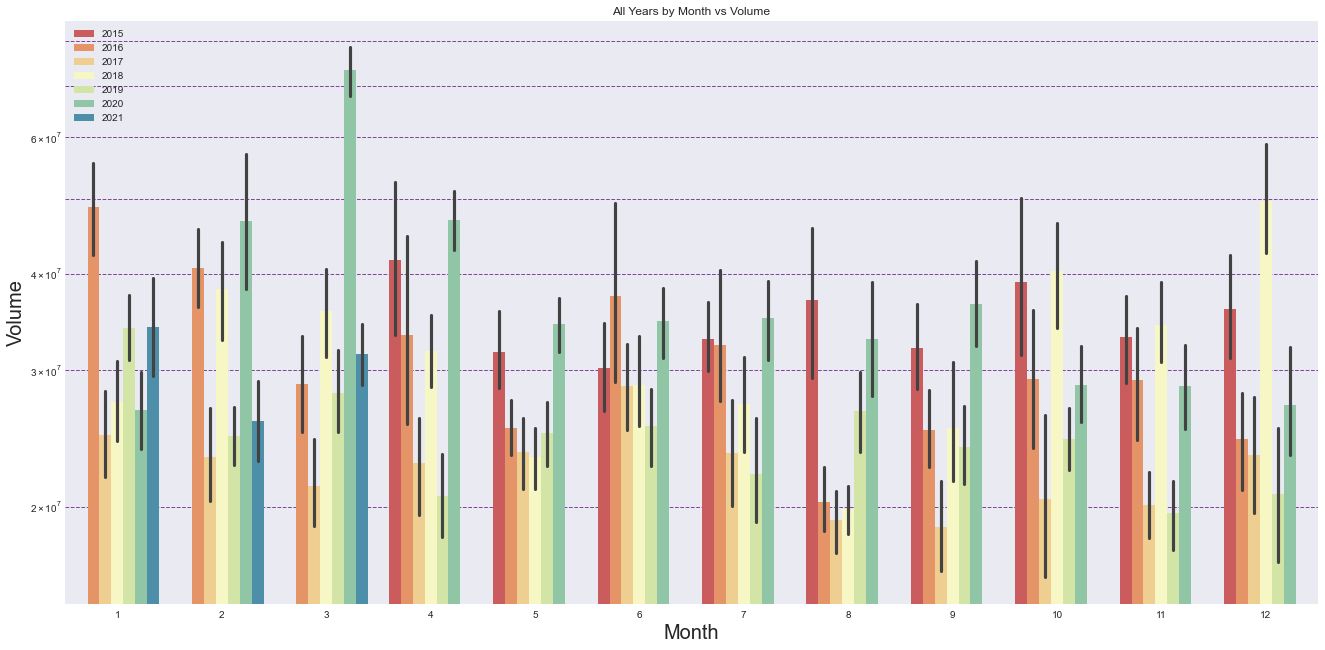

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(x=ms.Date.dt.month, y=ms.Volume, hue=ms.Date.dt.year, palette="Spectral")
plt.legend(loc="upper left")
plt.yscale("log")
plt.title("All Years by Month vs Volume")
plt.tick_params(axis="y", which="major", labelsize=20)
plt.xlabel("Month",fontsize=20)
plt.ylabel("Volume", fontsize=20)
plt.grid(which="minor",color="#84449c", linestyle="--")
plt.show()